In [17]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data=pd.read_csv(r"D:\DEPI_Sales_project\online_sales_dataset (2).csv")
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,01/01/2020 0:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,01/01/2020 1:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,01/01/2020 2:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,01/01/2020 3:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,01/01/2020 4:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          43848 non-null  int64  
 1   StockCode          43848 non-null  object 
 2   Description        43848 non-null  object 
 3   Quantity           43848 non-null  int64  
 4   InvoiceDate        43848 non-null  object 
 5   UnitPrice          43848 non-null  float64
 6   CustomerID         39497 non-null  float64
 7   Country            43848 non-null  object 
 8   Discount           43848 non-null  float64
 9   PaymentMethod      43848 non-null  object 
 10  ShippingCost       41704 non-null  float64
 11  Category           43848 non-null  object 
 12  SalesChannel       43848 non-null  object 
 13  ReturnStatus       43848 non-null  object 
 14  ShipmentProvider   43848 non-null  object 
 15  WarehouseLocation  40808 non-null  object 
 16  OrderPriority      438

In [20]:
data.shape

(43848, 17)

In [21]:
data .columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [22]:
data .dtypes

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object

DROP NULLS & UNNEEDED & DUPLICATED 

In [23]:
data .duplicated().sum()
#data=data.drop_duplicates()

0

In [24]:
data.iloc[1:5,1:16]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation
1,SKU_1241,White Mug,18,01/01/2020 1:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome
2,SKU_1501,Headphones,49,01/01/2020 2:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin
3,SKU_1760,Desk Lamp,14,01/01/2020 3:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome
4,SKU_1386,USB Cable,-30,01/01/2020 4:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN


In [25]:
data.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4351
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2144
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3040
OrderPriority           0
dtype: int64

In [26]:
data[data.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,01/01/2020 4:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
49,655839,SKU_1047,Office Chair,48,03/01/2020 1:00,4.74,NaN,Belgium,0.220000,Credit Card,23.11,Accessories,Online,Not Returned,UPS,London,High
62,305041,SKU_1731,Desk Lamp,45,03/01/2020 14:00,54.79,NaN,United Kingdom,0.230000,Credit Card,8.97,Accessories,In-store,Not Returned,DHL,NaN,Medium
71,672843,SKU_1953,Headphones,3,03/01/2020 23:00,99.17,NaN,United States,0.030000,paypall,11.58,Stationery,Online,Not Returned,DHL,London,Medium
103,124300,SKU_1951,Headphones,8,05/01/2020 7:00,46.19,NaN,Norway,0.100000,Bank Transfer,12.81,Stationery,In-store,Not Returned,UPS,NaN,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43810,568785,SKU_1037,Blue Pen,6,30/12/2024 10:00,79.06,NaN,United Kingdom,0.480000,Bank Transfer,17.81,Accessories,In-store,Not Returned,UPS,Paris,Low
43811,127224,SKU_1391,White Mug,13,30/12/2024 11:00,44.49,NaN,Sweden,0.020000,Bank Transfer,7.22,Stationery,In-store,Not Returned,DHL,NaN,Low
43821,568586,SKU_1683,T-shirt,9,30/12/2024 21:00,39.34,NaN,France,0.470000,paypall,24.27,Electronics,In-store,Not Returned,DHL,NaN,Low
43825,294251,SKU_1011,Desk Lamp,-50,31/12/2024 1:00,-71.36,NaN,Australia,1.740125,Bank Transfer,NaN,Electronics,Online,Returned,FedEx,NaN,Medium


In [27]:
data.dropna(inplace=True)
data . reset_index(drop=True)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,01/01/2020 0:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,01/01/2020 1:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,01/01/2020 2:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,01/01/2020 3:00,76.68,96586.0,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,744167,SKU_1006,Office Chair,47,01/01/2020 5:00,70.16,53887.0,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39492,832981,SKU_1375,Notebook,9,31/12/2024 19:00,56.60,31943.0,Spain,0.31,Credit Card,25.23,Electronics,Online,Returned,DHL,Berlin,Medium
39493,323852,SKU_1044,White Mug,8,31/12/2024 20:00,61.70,71691.0,Spain,0.39,Credit Card,10.66,Electronics,In-store,Not Returned,UPS,Paris,High
39494,105327,SKU_1434,T-shirt,1,31/12/2024 21:00,5.63,13097.0,Italy,0.26,paypall,14.17,Apparel,Online,Not Returned,Royal Mail,Rome,Low
39495,816606,SKU_1681,Notebook,23,31/12/2024 22:00,34.55,77085.0,United States,0.36,Credit Card,28.13,Furniture,In-store,Not Returned,UPS,Berlin,Medium


In [28]:
data[data.isnull().all(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority


### EDA 
1-UNI VARIANT ANALASYS
##
categorical | discrete numerical (bar pie)

numerical continues (histogram)
##
2-bi variate 
##
numerical _numerical (scateer) 

numerical _catecorical ( [box plot] )

categorical _categorical ( bar hue)

In [29]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,39497.000000,39497.000000,39497.000000,39497.000000,39497.000000,39497.000000
mean,550268.769400,24.875585,50.528676,54987.814594,0.250869,17.478543
std,260306.639518,14.163259,28.561482,25892.606732,0.144252,7.212964
min,100005.000000,1.000000,1.000000,10001.000000,0.000000,5.000000
25%,324737.000000,13.000000,25.860000,32783.000000,0.130000,11.220000
50%,552201.000000,25.000000,50.320000,55106.000000,0.250000,17.450000
75%,775221.000000,37.000000,75.240000,77242.000000,0.380000,23.710000
max,999997.000000,49.000000,100.000000,99998.000000,0.500000,30.000000


<Axes: ylabel='count'>

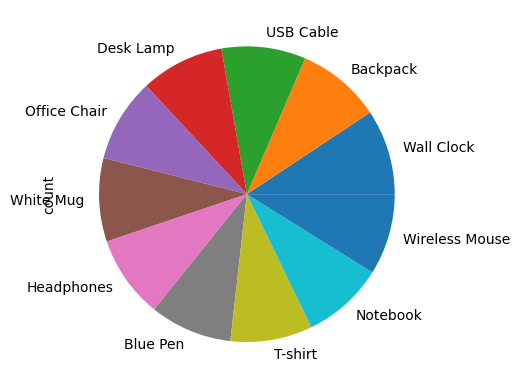

In [61]:
data['Description'].value_counts().plot(kind='pie'  )


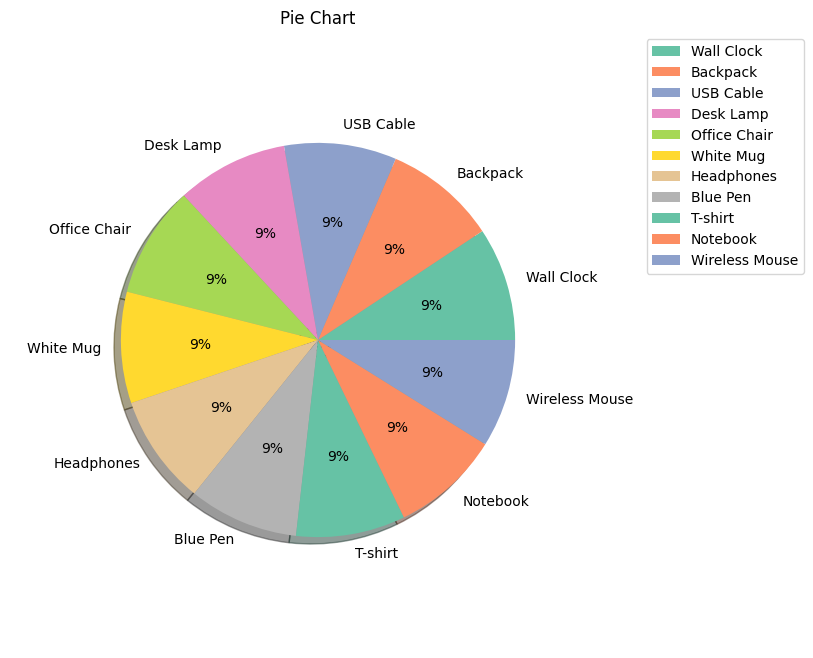

In [59]:
# pie chart
categories = list(data['Description'].value_counts().index)
counts = data['Description'].value_counts()
plt.figure(figsize=(15, 8))  # Increase width to create more space for legend
plt.pie(counts,                     # The values to be represented as slices
        labels=categories,          # Labels for the slices
        # colors=['red', 'g'],
        colors=sns.color_palette("Set2"),                # Colors for the slices
        #explode=[0, 0.1],               # List of fraction of radius with which to offset each wedge
        autopct='%0.0f%%',          # Format string for the labels
        shadow=True,               # Whether to draw a shadow behind the pie
        radius=0.8,                # Radius of the pie
        counterclock=True,          # Whether the pie is drawn counterclockwise
        frame=False,                # Whether to draw a frame around the pie
        rotatelabels=False,         # Whether to rotate the labels to best fit the pie
       )
plt.title('Pie Chart')
plt.legend(categories, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\3100587656.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='hls')
C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\3100587656.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, counts[i] + 5, counts[i], ha='center')


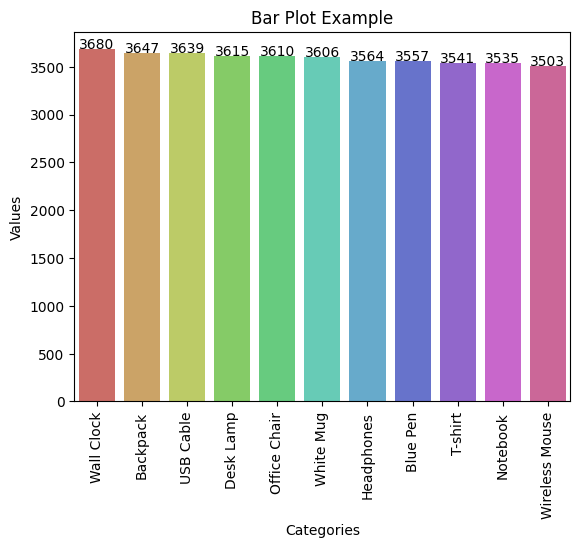

In [ ]:
# sns don't support pie charts
sns.barplot(x=categories, y=counts, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values' )
plt.title('Bar Plot Example')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Add values on top of the bars
for i in range(len(categories)):
    plt.text(i, counts[i] + 5, counts[i], ha='center')

<Axes: xlabel='Description'>

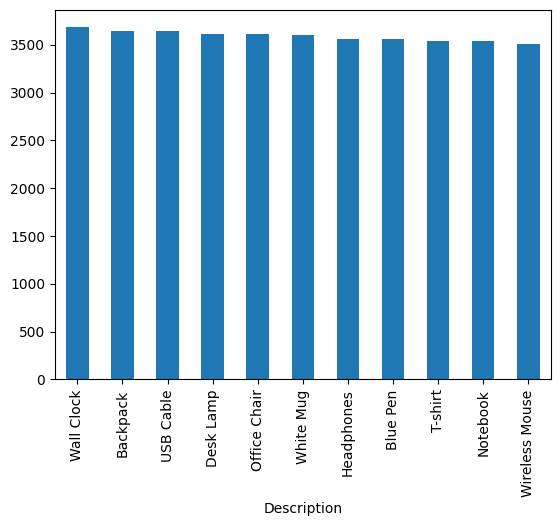

In [31]:
data['Description'].value_counts().plot(kind='bar'  )

<Axes: ylabel='Density'>

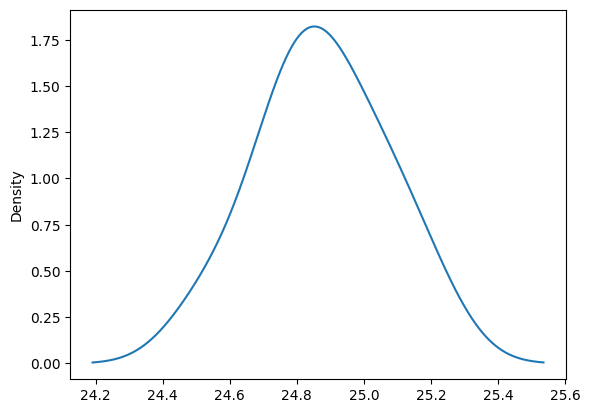

In [32]:
data.groupby('Description')['Quantity'].mean().plot(kind='density')

C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\155595925.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mean_quantity, color='blue', shade=True)


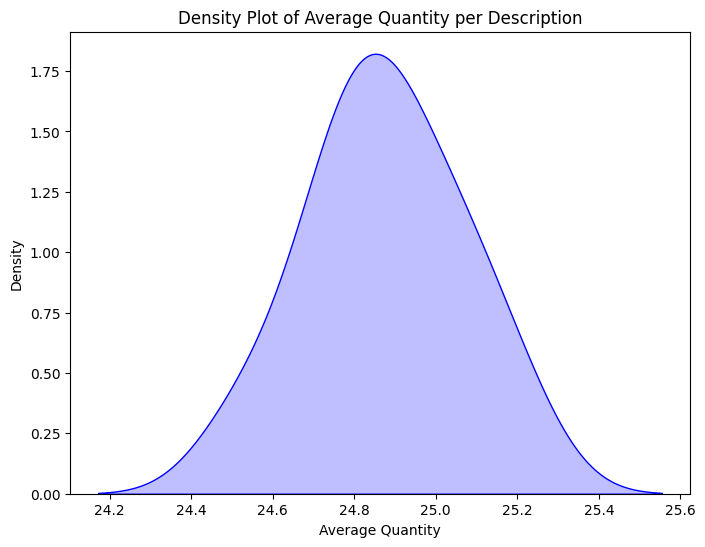

In [64]:
mean_quantity = data.groupby('Description')['Quantity'].mean()

plt.figure(figsize=(8, 6))  # Set figure size
sns.kdeplot(mean_quantity, color='blue', shade=True)

plt.title('Density Plot of Average Quantity per Description')
plt.xlabel('Average Quantity')
plt.ylabel('Density')

plt.show()

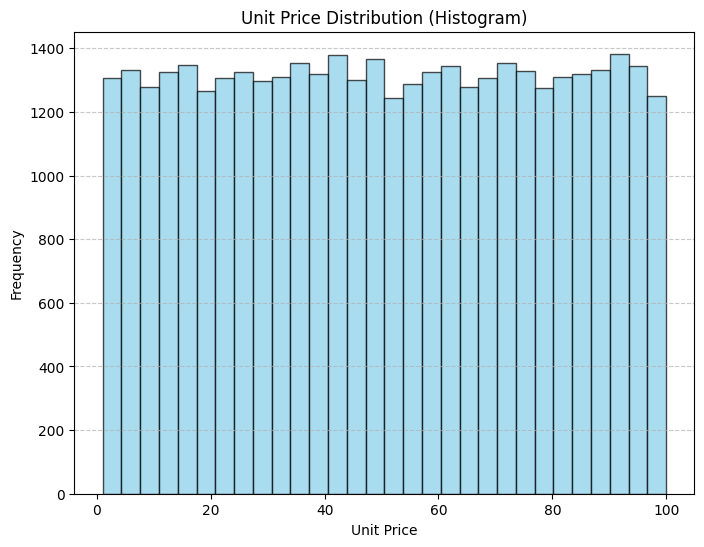

In [63]:
plt.figure(figsize=(8, 6))  # Set figure size
plt.hist(data['UnitPrice'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Unit Price Distribution (Histogram)')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

plt.show()

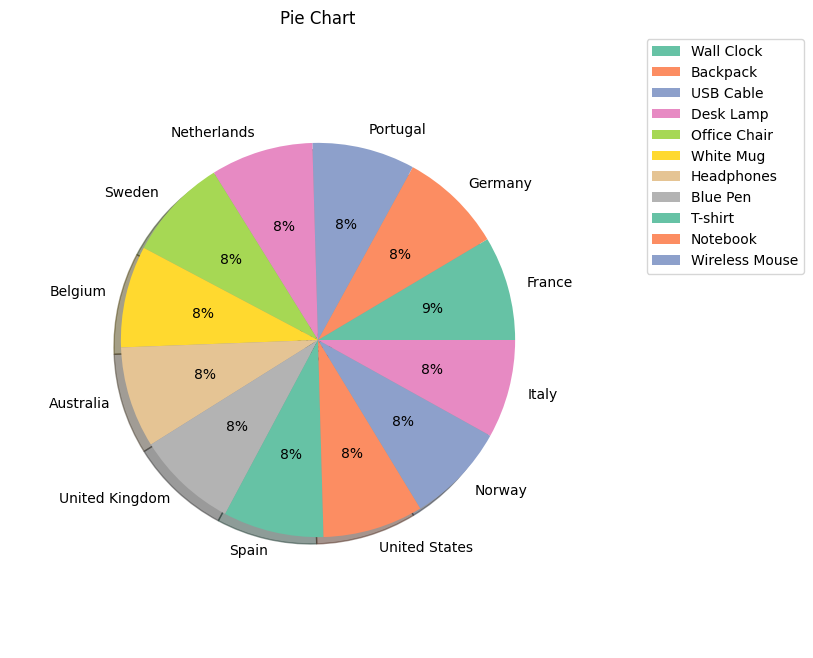

In [68]:
#data["Country"].value_counts().plot(kind='pie')
# pie chart
label = list(data['Country'].value_counts().index)
count = data['Country'].value_counts()
plt.figure(figsize=(15, 8))  # Increase width to create more space for legend
plt.pie(count,                     # The values to be represented as slices
        labels=label,          # Labels for the slices
        # colors=['red', 'g'],
        colors=sns.color_palette("Set2"),                # Colors for the slices
        #explode=[0, 0.1],               # List of fraction of radius with which to offset each wedge
        autopct='%0.0f%%',          # Format string for the labels
        shadow=True,               # Whether to draw a shadow behind the pie
        radius=0.8,                # Radius of the pie
        counterclock=True,          # Whether the pie is drawn counterclockwise
        frame=False,                # Whether to draw a frame around the pie
        rotatelabels=False,         # Whether to rotate the labels to best fit the pie
       )
plt.title('Pie Chart')
plt.legend(categories, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\1470742679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='hls')
C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\1470742679.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, counts[i] + 5, counts[i], ha='center')


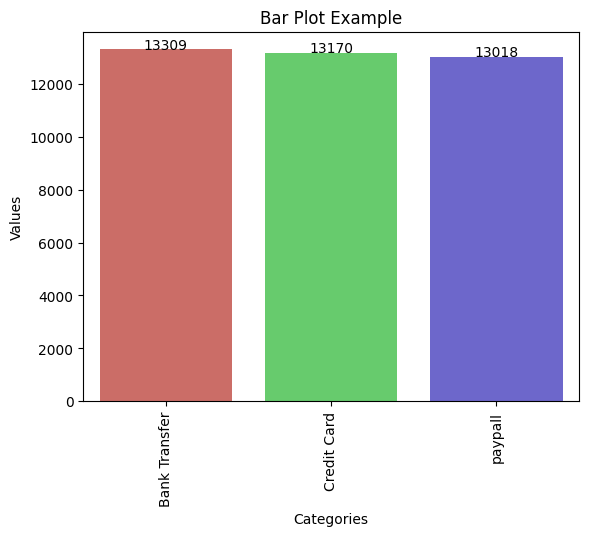

In [ ]:
#data["PaymentMethod"].value_counts().plot(kind='bar')
categories=list(data["PaymentMethod"].value_counts().index)#['Bank Transfer', 'Credit Card', 'paypall']
counts=data["PaymentMethod"].value_counts()
sns.barplot(x=categories, y=counts, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values' )
plt.title('Bar Plot Example')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Add values on top of the bars
for i in range(len(categories)):
    plt.text(i, counts[i] + 5, counts[i], ha='center')

C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\3654774940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='hls')
C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\3654774940.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, counts[i] + 5, counts[i], ha='center')


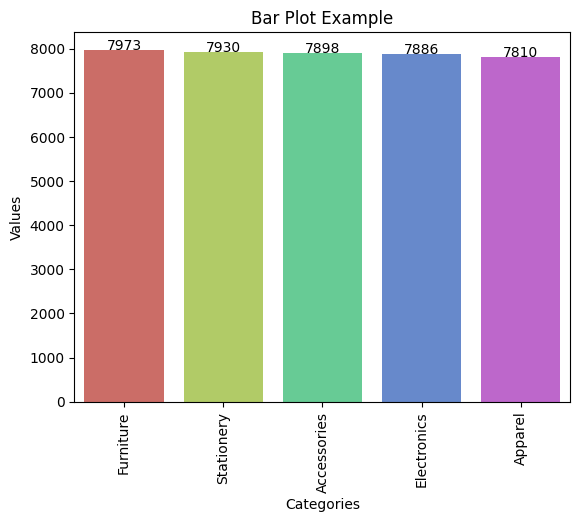

In [ ]:
#data['Category'].value_counts().plot(kind='bar')
categories=list(data['Category'].value_counts().index)
counts=data['Category'].value_counts()
sns.barplot(x=categories, y=counts, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values' )
plt.title('Bar Plot Example')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Add values on top of the bars
for i in range(len(categories)):
    plt.text(i, counts[i] + 5, counts[i], ha='center')

C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\3557785536.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='hls')
C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\3557785536.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, counts[i] + 5, counts[i], ha='center')


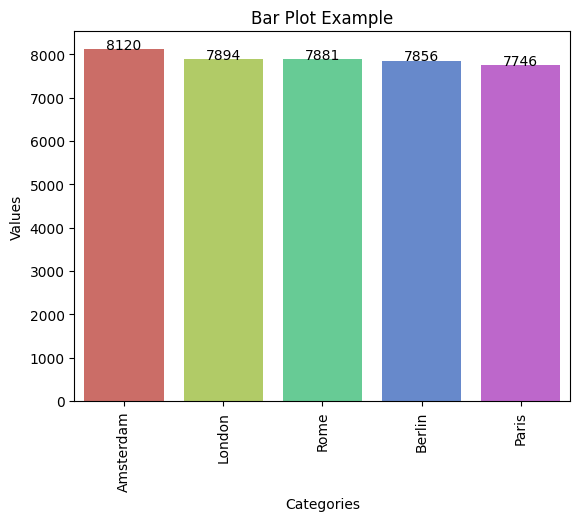

In [ ]:
#data['WarehouseLocation'].value_counts().plot(kind='bar')
categories=list(data['WarehouseLocation'].value_counts().index)
counts=data['WarehouseLocation'].value_counts()
sns.barplot(x=categories, y=counts, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values' )
plt.title('Bar Plot Example')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Add values on top of the bars
for i in range(len(categories)):
    plt.text(i, counts[i] + 5, counts[i], ha='center')


In [76]:
#data['OrderPriority'].value_counts().plot(kind='bar')
# categories=list(data['OrderPriority'].value_counts().index)
# counts=data['OrderPriority'].value_counts()
# sns.barplot(x=categories, y=counts, palette='hls')

# # Add labels and title
# plt.xlabel('Categories')
# plt.ylabel('Values' )
# plt.title('Bar Plot Example')
# # Rotate x-axis labels
# plt.xticks(rotation=90)
# # Add values on top of the bars
# for i in range(len(categories)):
#     plt.text(i, counts[i] + 5, counts[i], ha='center')

C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\1411203645.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='hls')
C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\1411203645.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, counts[i] + 5, counts[i], ha='center')


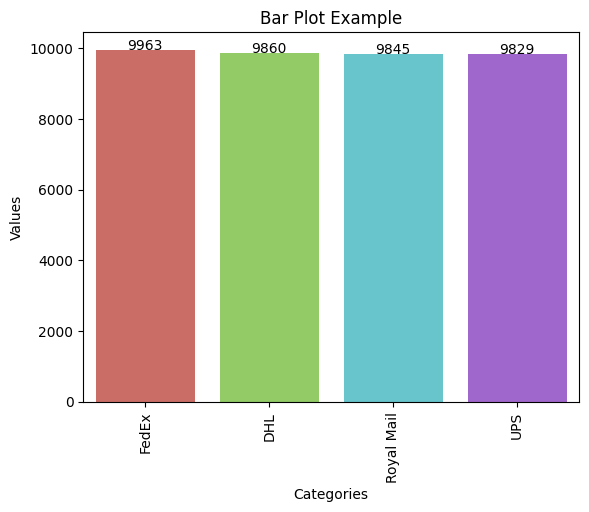

In [ ]:
#data['ShipmentProvider'].value_counts().plot(kind='bar')
categories=list(data['ShipmentProvider'].value_counts().index)
counts=data['ShipmentProvider'].value_counts()
sns.barplot(x=categories, y=counts, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values' )
plt.title('Bar Plot Example')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Add values on top of the bars
for i in range(len(categories)):
    plt.text(i, counts[i] + 5, counts[i], ha='center')

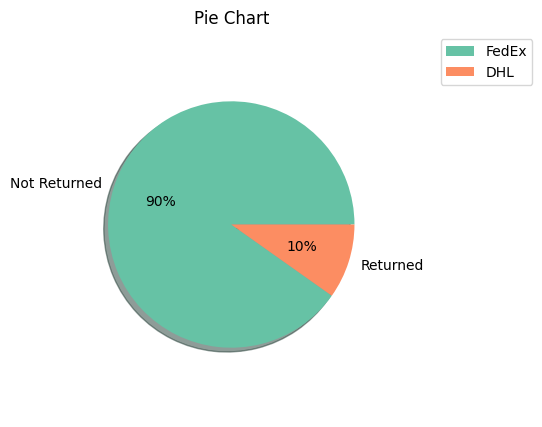

In [81]:
#data['ReturnStatus'].value_counts().plot(kind='bar')

plt.figure(figsize=(10, 5))  # Increase width to create more space for legend
plt.pie(data['ReturnStatus'].value_counts(),                     # The values to be represented as slices
        labels=list(data['ReturnStatus'].value_counts().index),          # Labels for the slices
        # colors=['red', 'g'],
        colors=sns.color_palette("Set2"),                # Colors for the slices
        #explode=[0, 0.1],               # List of fraction of radius with which to offset each wedge
        autopct='%0.0f%%',          # Format string for the labels
        shadow=True,               # Whether to draw a shadow behind the pie
        radius=0.8,                # Radius of the pie
        counterclock=True,          # Whether the pie is drawn counterclockwise
        frame=False,                # Whether to draw a frame around the pie
        rotatelabels=False,         # Whether to rotate the labels to best fit the pie
       )
plt.title('Pie Chart')
plt.legend(categories, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

In [95]:
categories=list(data['Description'].value_counts().index)
counts=data['Description'][data['ReturnStatus']=='Returned'].count()
counts

3873

C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\43675542.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='hls')
C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\43675542.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, counts[i] + 5, counts[i], ha='center')


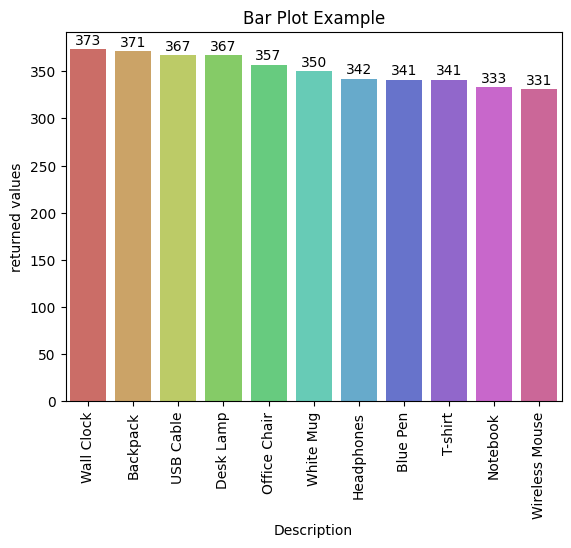

In [ ]:
#data['Description'][data['ReturnStatus']=='Returned'].count
# most returned 
categories=list(data['Description'].value_counts().index)
counts=data['Description'][data['ReturnStatus']=='Returned'].value_counts()
sns.barplot(x=categories, y=counts, palette='hls')

# Add labels and title
plt.xlabel('Description')
plt.ylabel('returned values' )
plt.title('Bar Plot Example')
# Rotate x-axis labels
plt.xticks(rotation=90)
# Add values on top of the bars
for i in range(len(categories)):
    plt.text(i, counts[i] + 5, counts[i], ha='center')


C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\2638411298.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=counts, palette='hls', ax=axes[0])
C:\Users\Esc\AppData\Local\Temp\ipykernel_20804\2638411298.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[0].text(i, counts[i] + 5, counts[i], ha='center')


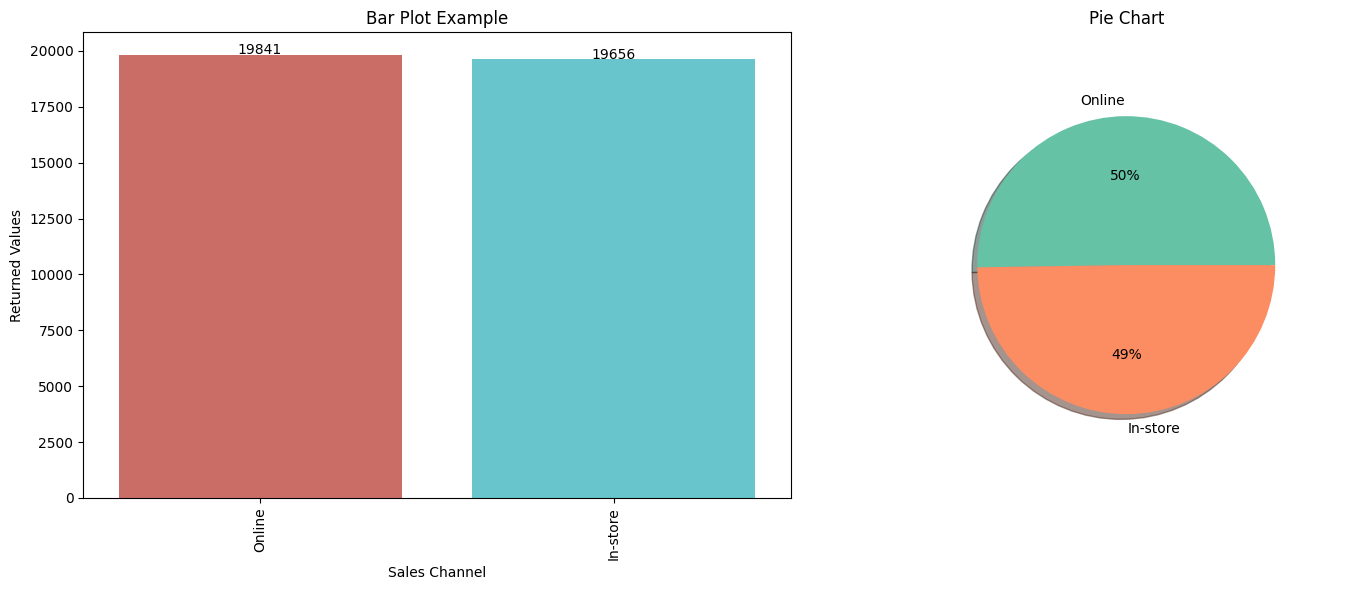

In [106]:
#data['SalesChannel'].value_counts().plot(kind='bar')
categories=list(data['SalesChannel'].value_counts().index)
counts=data['SalesChannel'].value_counts()




# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar Plot
sns.barplot(x=categories, y=counts, palette='hls', ax=axes[0])
axes[0].set_xlabel('Sales Channel')
axes[0].set_ylabel('Returned Values')
axes[0].set_title('Bar Plot Example')
axes[0].tick_params(axis='x', rotation=90)

# Add values on top of bars
for i in range(len(categories)):
    axes[0].text(i, counts[i] + 5, counts[i], ha='center')

# Pie Chart
axes[1].pie(counts, 
            labels=categories, 
            colors=sns.color_palette("Set2"),
            autopct='%d%%', 
            shadow=True, 
            radius=0.8, 
            counterclock=True,
            frame=False)
axes[1].set_title('Pie Chart')

# Adjust layout and show
plt.tight_layout()
plt.show()



In [42]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,01/01/2020 0:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,01/01/2020 1:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
